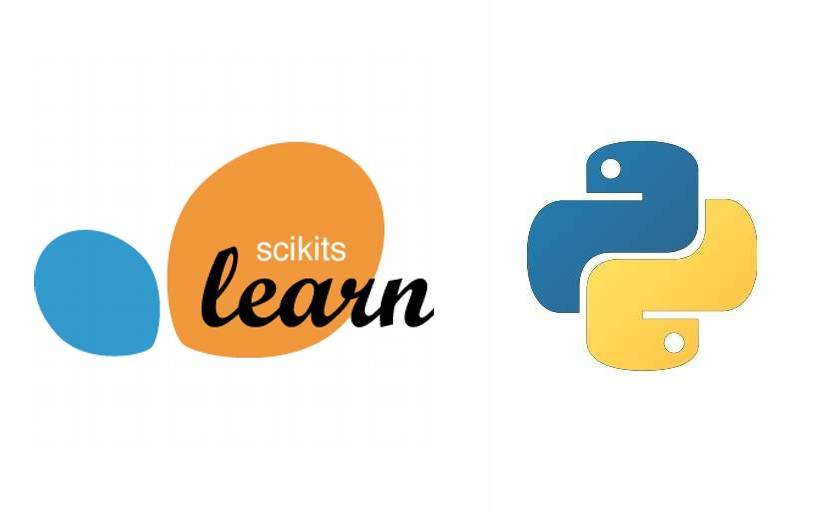

# BID01 - Pengenalan Data Science

Nama: Angelique Keyko Haryono

NRP: 2073016

### Week 5 - Classification dengan K-Nearest Neighbours

1. Sample Dataset
2. Classification dengan K-Nearest Neighbours
3. Preprocessing Dataset
4. Training KNN Classification Model

KNN merupakan model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat. Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression tasks. Untuk mengetahui mengenai KKN, kita bisa membuka link referensi berikut:
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

#### Sample Dataset

Pada contoh ini, kita akan membentuk dataset dengan format pandas dataframe yang berisi daftar tinggi dan berat badan partisipan beserta jenis kelaminnya.

In [3]:
# mengimport modul pandas
import pandas as pd

# menyiapkan dictionary dimana setiap keynya akan berasosiasi dengan list
sensus = {
    'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 178], # features
    'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67],           # features
    'jk': [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', # target
        'wanita'
    ]
}

# membentuk object dataframe dari dictionary yang sudah dibentuk
sensus_df = pd.DataFrame(sensus)

# menampung object dataframe yang dibentuk dalam variable sensus_df
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


#### Visualisasi Data

Pada contoh ini, kita akan melakukan visualisasi dataset yang sudah kita bentuk menjadi scatter plot. Sumbu x akan berasosiasi dengan tinggi badan. Sumbu y akan berasosiasi dengan berat badan.

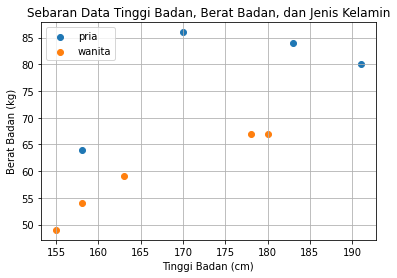

In [5]:
# mengimport modul matplotlib.pyplot
import matplotlib.pyplot as plt

# membentuk subplots
fig,ax = plt.subplots()

# melakukan looping terhadap data sensus
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

# mengaktifkan label
plt.legend(loc='upper left')

# melakukan pengaturan title dan label
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')

# mengaktifkan grid
plt.grid(True)

# menunjukkan hasil scatter plot
plt.show()

Pada contoh kali ini kita akan menerapkan KNN untuk mengklasifikasi jenis kelamin berdasarkan data tinggi dan berat badan. Model machine learning KKN akan memprediksi jenis kelamin berdasarkan kemiripan features dengan data set yang dimiliki.

#### Preprocessing Dataset

Kita harus melakukan penyesuaian untuk dataset kita. Kita akan mengonversikan data tinggi badan dan berat badan ke dalam numpy array, hasil konversi ini akan ditampung dalam variable X_train. Data jenis kelamin juga akan dikonversikan ke dalam numpy array, hasil konversi ini akan ditampung dalam variable y_train. 

In [6]:
# mengimport modul numpy
import numpy as np

# melakukan konversi menjadi numpy array
X_train = np.array(sensus_df[['tinggi', 'berat']]) # sekumpulan nilai features
y_train = np.array(sensus_df['jk'])                # sekumpulan nilai target

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


Jika kita melihat nilai output diatas, nilai features sudah siap untuk digunakan dalam proses training. Tetapi nilai target yang kita miliki masih bertipe data String. Sebenarnya dalam kasus classification dengan KNN, tipe data String masih bisa diproses dengan baik. Tetapi nanti akan terdapat kendala ketika melakukan evaluasi model. Oleh karena itu, tipe data String ini akan kita ubah menjadi numerik. Kita bisa memanfaatkan LabelBinarizer. 

In [9]:
# mengimport LabelBinarizer
from sklearn.preprocessing import LabelBinarizer

# membentuk object dari class LabelBinarizer
lb = LabelBinarizer()

# memanfaatkan object LabelBinarizer untuk melakukan transformasi data dalam variable y_train
y_train = lb.fit_transform(y_train)

# menunjukkan nilai y_train
print(f'y_train:\n{y_train}')

# data bernilai 0 merepresentasikan data pria. 
# data bernilai 1 merepresentasikan data wanita.

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


Hasil transformasi data dengan LabelBinarizer untuk sekumpulan nilai target tersimpan dalam format array 2 dimensi. Oleh karena itu kita harus mengubahnya kembali menjadi array 1 dimensi.

In [10]:
# mengubah menjadi array 1 dimensi
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


#### Training KNN Classification Model

Kita akan melakukan training dataset menggunakan KNN Classification Model. Yang perlu kita lakukan adalah mengimport `KNeighborsClassifier`. `KNeighborsClassifier` memiliki 1 parameter yang harus kita definisikan yaitu parameter `K`. Parameter `K` berguna untuk menentukan jumlah tetangga terdekat yang akan dilibatkan untuk proses prediksi. Dalam pembentukan object class `KNeighborsClassifier`, terdapat 1 parameter yaitu `n_neighbors`. Pada contoh ini parameter tersebut diisi nilai `K`. 

In [ ]:
# import estimator class KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

K = 3

# membentuk object dari class KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=K)

# melakukan training data set 
model.fit(X_train, y_train)